# Exercise sheet 2

__Handout date:__ 23.05.2024  
__Submission deadline:__ 19.06.2024 - 23:59  
__Topics:__ Classification.

The exercise sheet is regarded as passed if at __least 50% of the points__ are obtained.  
50% of the exercise sheets need to be passed to participate in the exam. 

Add your answers by editing the marked cells. Keep your answers brief and clear.

## MNIST - Dataset (1p per completed task)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neural_network import MLPClassifier

In [8]:
# set a random seed
np.random.seed(1)

-- __Task__: Load the MNIST-dataset from scikit-learn

In [9]:
ORIGINAL = True

if ORIGINAL:
    mnist = fetch_openml(name="mnist_784")
    images = np.asarray(mnist["data"], dtype="uint8")  # 28x28
    target = np.asarray(mnist["target"], dtype="uint8")
    
else:  # less complex dataset of smaller size
    digits = datasets.load_digits()

    # flatten the images
    n_samples = len(digits.images)  
    images = digits.images.reshape((n_samples, -1))  # 8x8 
    target = digits.target

-- __Task__: Split the dataset into train- (70%), validation- (20%) and test-dataset (10%) (with [sklearn - train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))

In [10]:
# split of the training data
X_train, X_temp, y_train, y_temp = train_test_split(
    images, target, test_size=0.3, shuffle=False
)
# split the remaining data into validation and test
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.333, shuffle=False
)

-- __Task__: Visualize the first training example of each class

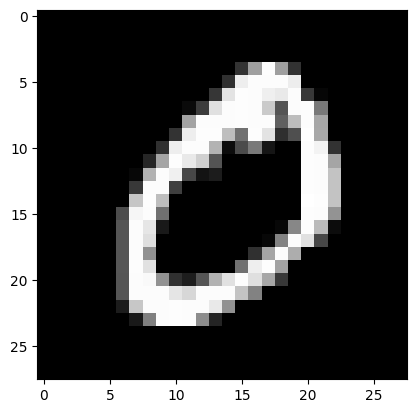

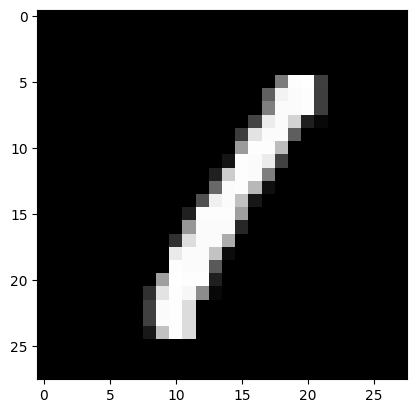

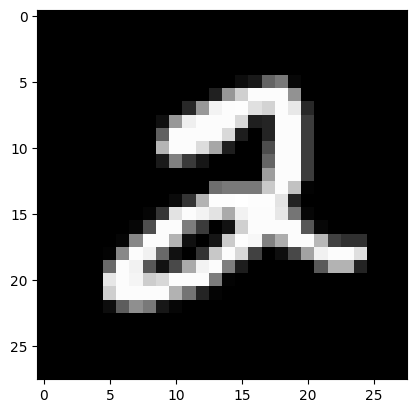

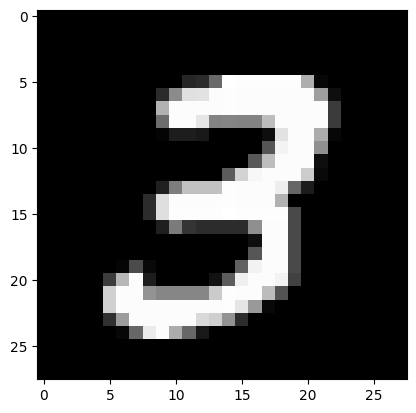

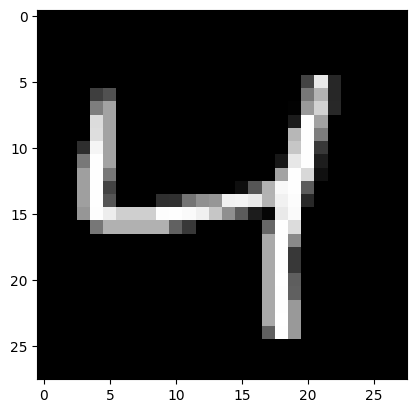

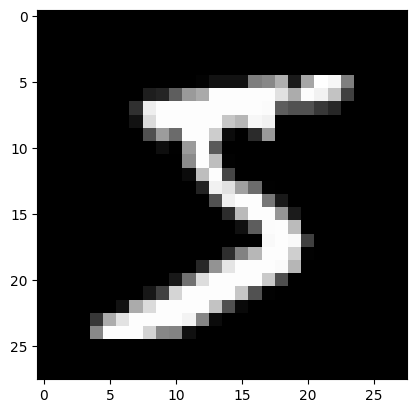

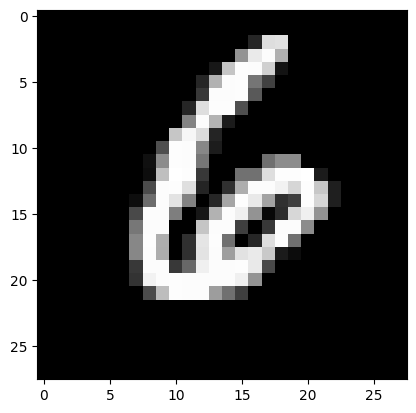

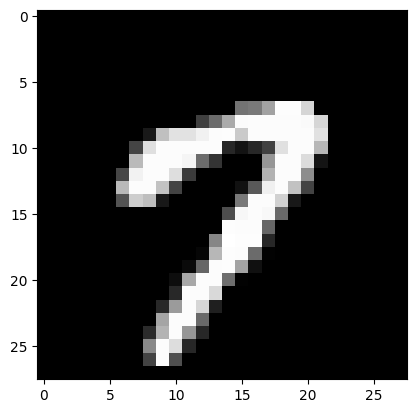

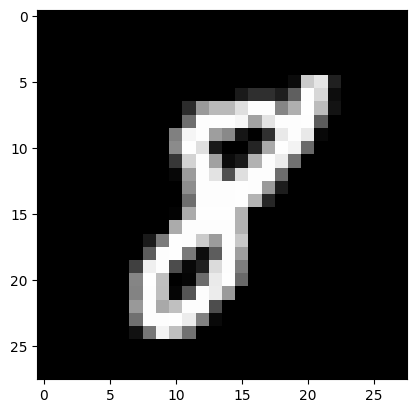

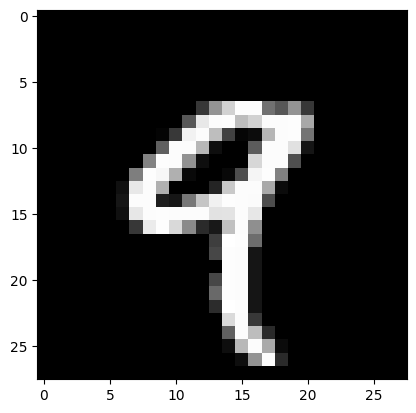

In [11]:
for i in range(10):
    mask = y_train == i
    index = np.argmax(mask)
    
    if X_train.shape[1] == 64:
        plt.imshow((X_train[index].reshape((8, 8))), cmap="gray")
    else:
        plt.imshow((X_train[index].reshape((28, 28))), cmap="gray")
    plt.show()

## kNN - Classification (1p per completed task)

There are two hyperparameters for kNN-Classification: the distance metric and k. In this exercise we will use the manhattan distance (L1), and will find the optimal k.

-- __Question__: Name one advantage and one disadvantage of kNN-Classification.

__Answer__: For example: 
Advantages:
* Simple to understand and implement
* No training time
* Can be easily updated with new data

Disadvantages:
* Needs to store all the training data
* Slow at inference time

-- __Task__: Choose k=1. Calculate a kNN model with k=1 using the scikit-learn package. Only use the training dataset for the model.

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

-- __Task__: Calculate the prediction of this model for the validation datset.

In [13]:
prediction = knn.predict(X_valid)

accuracy = (prediction == y_valid).mean()
print(accuracy)

0.9651602770043549


-- __Task__: Repeat these steps for k=1 to 10.

In [14]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    prediction = knn.predict(X_valid)

    accuracy = (prediction == y_valid).mean()
    accuracies.append(accuracy)

-- __Task__: Plot the accuracy for k=1 to 10. Choose the best k.

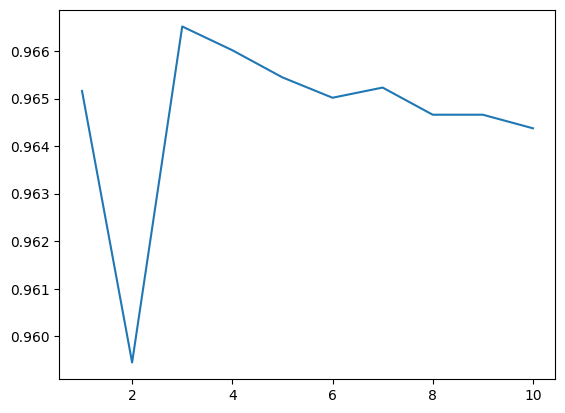

Best k: 3


In [15]:
plt.plot(range(1, 11), accuracies)
plt.show()

best_k = np.argmax(accuracies) + 1
print(f"Best k: {best_k}")

-- __Task__: Train a new kNN model with your chosen k and the train- and validation-dataset.

In [16]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(np.vstack((X_train, X_valid)), np.concatenate((y_train, y_valid)))

KNeighborsClassifier(n_neighbors=3)

-- __Task__: Evaluate the final model on the test-dataset.

In [17]:
prediction = knn.predict(X_test)

-- __Task__: Plot a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) of the model on the test-dataset.

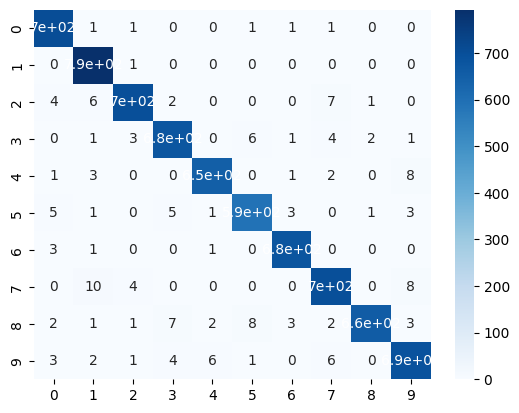

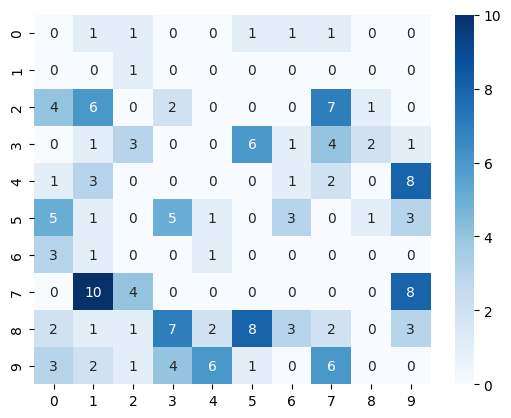

In [18]:
cf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()

cf_matrix[np.eye(10) == 1] = 0
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()

-- __Question__: Which two classes are confused the most? Does this results surprise you?

__Answer__: 1 and 7. Not surprising, as these two numbers can be very similar. Also 4 and 9, as well as 3 and 8, 7 and 9 and 5 and 8.

## PCA and linear classification (1p per completed task)

In these next tasks we want to compute simple features and use them to train a linear classifier.

--__Task__: Calculate a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) for the training dataset.

In [19]:
pca = PCA().fit(X_train)

-- __Task__: Choose as many principal components as needed to reach 90%.

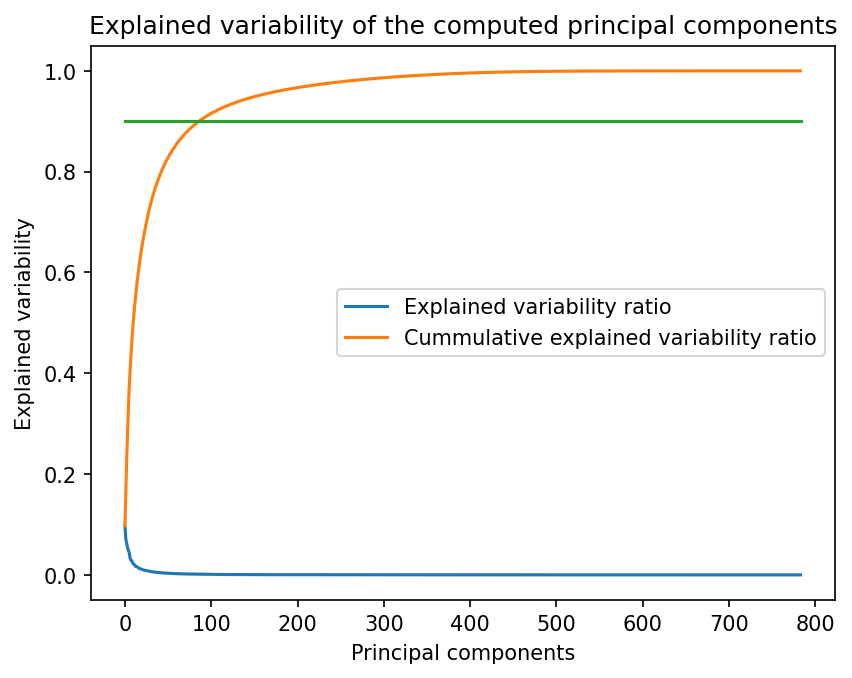

Chosen number of components: 87


In [20]:
evr = pca.explained_variance_ratio_
cvr = np.cumsum(evr)
plt.figure(dpi=150)
plt.plot(evr, label="Explained variability ratio")
plt.plot(cvr, label="Cummulative explained variability ratio")
plt.plot([0, 784], [0.9, 0.9])
plt.legend()
plt.title("Explained variability of the computed principal components")
plt.ylabel("Explained variability")
plt.xlabel("Principal components")
plt.show()

n_components = np.argmax(cvr > 0.9) + 1

print(f"Chosen number of components: {n_components}")

In [21]:
# do this automatically with the PCA module
pca = PCA(n_components=0.9).fit(X_train)
print(pca.n_components_)

87


-- __Task__: Train a [linear classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron) with these principal components.

In [22]:
linear_classifier = Perceptron().fit(pca.transform(X_train), y_train)

-- __Task__: Compute the accuracy for this model on the test-dataset.

In [23]:
prediction = linear_classifier.predict(pca.transform(X_test))

accuracy = np.mean(prediction == y_test)
print(accuracy)

0.6908336908336908


## MLP classification (1p per completed task)

 Because training a CNN neural network is to complex for a exercise sheet, but we will revisit them for our next project. In this exercise we will train a multi-layer-perceptron for the classification task on the MNIST-dataset.

-- __Task__: Scale the training data to 
    ```mean=0``` and ```std=1```.

In [27]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

-- __Task__: Fit a [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) with appropiate hyperparameters.

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=[128, 64], activation="relu", solver="adam", verbose=True)
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.34890549
Iteration 2, loss = 0.12265995
Iteration 3, loss = 0.08013098
Iteration 4, loss = 0.05475529
Iteration 5, loss = 0.03946857
Iteration 6, loss = 0.02724698
Iteration 7, loss = 0.01872585
Iteration 8, loss = 0.01421612
Iteration 9, loss = 0.00964860
Iteration 10, loss = 0.00695122
Iteration 11, loss = 0.00639681
Iteration 12, loss = 0.01115580
Iteration 13, loss = 0.02784149
Iteration 14, loss = 0.02969765
Iteration 15, loss = 0.01983101
Iteration 16, loss = 0.01090087
Iteration 17, loss = 0.00357195
Iteration 18, loss = 0.00221287
Iteration 19, loss = 0.00164837
Iteration 20, loss = 0.00155280
Iteration 21, loss = 0.00063283
Iteration 22, loss = 0.00056654
Iteration 23, loss = 0.00048136
Iteration 24, loss = 0.00042123
Iteration 25, loss = 0.00038903
Iteration 26, loss = 0.00036322
Iteration 27, loss = 0.00034417
Iteration 28, loss = 0.00032650
Iteration 29, loss = 0.00031250
Iteration 30, loss = 0.00030363
Iteration 31, loss = 0.00028881
Iteration 32, los

MLPClassifier(hidden_layer_sizes=[128, 64], verbose=True)

-- __Task__: Apply the model to the test dataset (don't forget to scale the test dataset)

In [41]:
prediction = mlp.predict(scaler.transform(X_test))

accuracy = np.mean(prediction == y_test)
print(accuracy)

0.9804089804089804


-- __Task__: Calculate the confusion matrix for the test dataset.

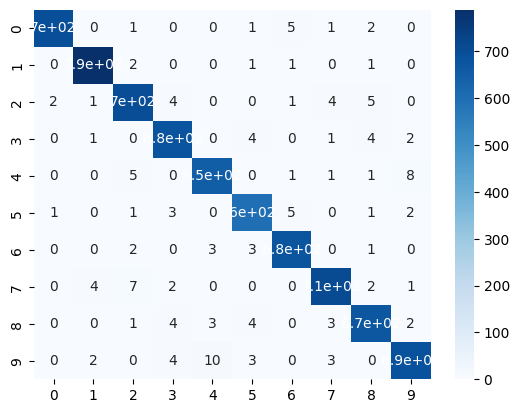

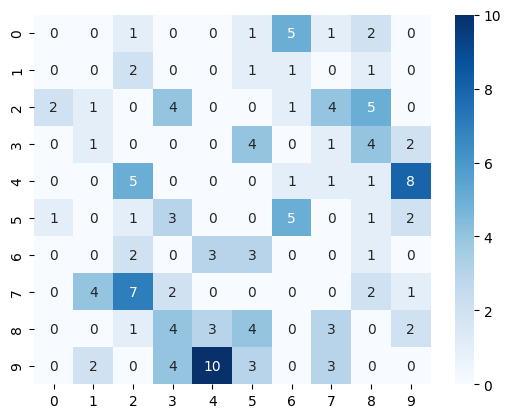

In [31]:
cf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()

cf_matrix[np.eye(10) == 1] = 0
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.show()

## Comparison (1p per completed task)

-- __Task__: Plot the accuracy of all three models (kNN, PCA + Linear and MLP).

In [32]:
prediction_knn = knn.predict(X_test)
prediction_linear = linear_classifier.predict(pca.transform(X_test))
prediction_mlp = mlp.predict(scaler.transform(X_test))

accuracy_knn = np.mean(prediction_knn == y_test)
accuracy_linear = np.mean(prediction_linear == y_test)
accuracy_mlp = np.mean(prediction_mlp == y_test)

print("Accuracy of:")
print(f"KNearestNeighbour k={best_k}: {100*accuracy_knn:4.2f}%")
print(f"PCA + LinearClassifier: {100*accuracy_linear:4.2f}%")
print(f"MultiLayerPerceptron  : {100*accuracy_mlp:4.2f}%")

Accuracy of:
KNearestNeighbour k=3: 97.75%
PCA + LinearClassifier: 69.08%
MultiLayerPerceptron  : 98.04%


-- __Task__: Choose the best model and think of a possible improvement.

* KNN: Hard to improve, as there are not a lot of hyperparameters.
* PCA + LinearClassifier: Instead of a perceptron use a logistic regression model. Slightly increase the explained variability of the PCA.
* MLP: Switch to a CNN (Convolutional Neural Network). Run a hyperparameter search over different architectures, solvers and learning parameters.

In [33]:
logistic_classifier = LogisticRegression(solver="sag").fit(pca.transform(X_train), y_train)

In [34]:
prediction = logistic_classifier.predict(pca.transform(X_test))

accuracy = np.mean(prediction == y_test)
print(accuracy)

0.9243529243529244
